<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Validation Curves

In this notebook we will look at one technique for comparing models of varying complexity using what is called a validation curve.  Validation curves can help us determine where the optimal tradeoff between bias and variance is for a given dataset and algorithm.  

We will again use the sonar dataset we have previously used.  Details on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

In [1]:
# Import the libraries we know we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Download the sonar data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
data = pd.read_csv(url, header=None)
print(data.shape)
data.head()

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
# Create feature matrix using the first 60 columns as the features
X = data.iloc[:,:60]

# Create target vector from the last column
y = data.iloc[:,60]

# Let's set aside a test set and use the remainder for training and validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.3)

In [4]:
# Create a model - in this case we will use a Logistic Regression classification model
model = LogisticRegression(penalty='l2',C=0.5,random_state=0)

As we can see above, our Logistic Regression model has a hyperparameter C (the inverse of the regularization strength).  Applying more regularization (lower C) yields a simpler model, and less regularization (higher C) yields a more complex model.  We can use a validation curve to visualize the bias-variance tradeoff as we vary the value of C and select the optimal value.

In [8]:
# Set the range of values we want to evaluate for the hyperparameter min_samples_leaf
C_range=np.arange(0,1.,0.05)

# Set up the validation curve
train_scores,val_scores = validation_curve(estimator=model,
                                           X=X_train,
                                           y=y_train,
                                           param_name='C',
                                           param_range=C_range,
                                           cv=10,
                                          scoring='accuracy')

In [9]:
train_scores.shape, val_scores.shape

((20, 10), (20, 10))

In [10]:
# Calculate the mean across the folds for the training accuracy and validation accuracy
train_means = np.mean(train_scores,axis=1)
val_means = np.mean(val_scores,axis=1)

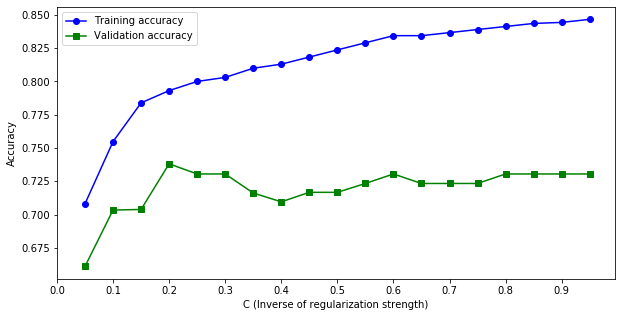

In [11]:
# Plot the mean training accuracy and validation accuracy
plt.figure(figsize=(10,5))
plt.plot(C_range,train_means,color='blue',marker='o',label='Training accuracy')
plt.plot(C_range,val_means,color='green',marker='s',label='Validation accuracy')
plt.legend()
plt.xticks(ticks=np.arange(0,1,0.1))
plt.xlabel('C (Inverse of regularization strength)')
plt.ylabel('Accuracy')
plt.show()

As we can see above, there appears to be an optimal value of C around 0.2.  Above this, the training accuracy and validation accuracy diverge - training accuracy continues to improve as the model becomes more complex, but the validation accuracy remains flat or decreases slightly.  This is a good indication that the more complex models are overfitting the data.